# Cartes animées

On trace ici des cartes animées représentant l'évolution de diverses variables d'intérêt dans le temps au cours de la période d'étude, à l'aide de la fonction draw().

NB : l'affichage des cartes est possible en exécutant les dernières cellules du notebook, que nous avons mises en commentaire car leur volume important nous empêche de commit en les ayant exécuté. De même, le return de la fonction draw est en commentaire. Vous pouvez visualiser ces cartes en enlevant les # et en exécutant les cellules.

In [1]:
import folium
import pandas as pd
from folium.plugins import TimestampedGeoJson
from shapely.geometry import Point
import numpy as np
from branca.colormap import linear

In [ ]:
# Charger les données à partir du fichier CSV
file_path = 'csv/Final.csv'  
data = pd.read_csv(file_path, parse_dates=['timestamp'])
df = pd.DataFrame(data)

In [9]:
print(data.head())  # Voir les premières lignes du dataset
print(data.describe())  # Statistiques descriptives pour détecter les anomalies
print(data['moyenne_k'].value_counts())  # Fréquences des valeurs spécifiques


   Unnamed: 0                 timestamp carre_id  distance_to_closest_1  \
0           0 2020-01-22 01:00:00+00:00     1_15               0.008150   
1           1 2020-01-22 01:00:00+00:00     1_16               0.006918   
2           2 2020-01-22 01:00:00+00:00     1_17               0.003534   
3           3 2020-01-22 01:00:00+00:00     1_18               0.005122   
4           4 2020-01-22 01:00:00+00:00     1_20               0.011732   

   taux_occup_closest_1  distance_to_closest_2  taux_occup_closest_2  \
0              0.666667               0.011619              0.333333   
1              0.666667               0.006982              0.333333   
2              0.333333               0.008904              0.666667   
3              0.333333               0.009908              0.583333   
4              0.333333               0.014273              0.333333   

   distance_to_closest_3  taux_occup_closest_3  normalized_distance  \
0               0.014112              0.58333

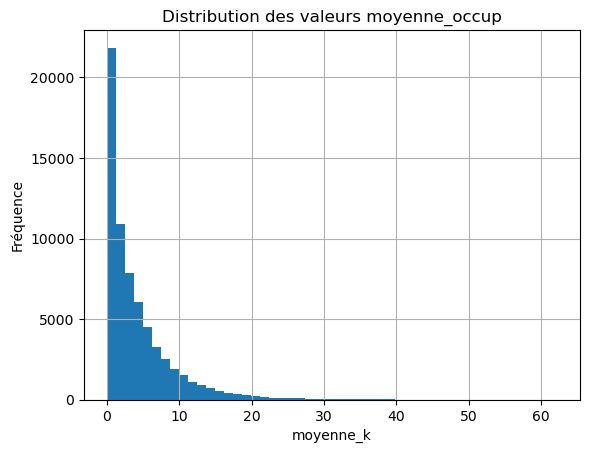

In [4]:
import matplotlib.pyplot as plt

data['moyenne_k'].hist(bins=50)
plt.title("Distribution des valeurs moyenne_occup")
plt.xlabel("moyenne_k")
plt.ylabel("Fréquence")
plt.show()


In [10]:
# Préparer les coins des carrés à partir des centres
square_size = 0.005  # Taille des carrés (latitude/longitude)
data['lat_min'] = data['lati'] - square_size / 2
data['lat_max'] = data['lati'] + square_size / 2
data['lon_min'] = data['long'] - square_size / 2
data['lon_max'] = data['long'] + square_size / 2


Fonction qui génère une série temporelle sous forme de carte pour la variable étudiée

In [15]:


def draw(var):

    # Préparer la colormap
    cmap = linear.PuRd_09.scale(data[var].min(), data[var].max())

    # Initialiser la carte centrée sur Paris
    m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

    # Préparer le GeoJSON pour animer les carrés
    geojson_data = []

    for _, row in data.iterrows():
        # Définir la couleur du carré en fonction de 'moyenne_k'
        color = cmap(row[var])

        # Ajouter le carré à la liste GeoJSON
        geojson_data.append({
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [row['lon_min'], row['lat_min']],
                    [row['lon_min'], row['lat_max']],
                    [row['lon_max'], row['lat_max']],
                    [row['lon_max'], row['lat_min']],
                    [row['lon_min'], row['lat_min']]  # Fermer le polygone
                ]]
            },
            "properties": {
                "time": row['timestamp'].isoformat(),
                "style": {
                    "color": "",
                    "fillColor": color,
                    "fillOpacity": 0.4,
                },
                "popup": (f"Heure: {row['timestamp']}<br>"
                        f"Moyenne Occup: {row[var]:.2f}<br>")
            }
        })


        

    # Ajouter l'animation des carrés sur la carte
    TimestampedGeoJson(
        {"type": "FeatureCollection", "features": geojson_data},
        period='PT1H',  # Intervalle entre les changements (1 heure)
        duration="PT1H",  # Durée d'affichage de chaque état
        auto_play=True,   # Lancer automatiquement
        loop=False,       # Ne pas boucler
        add_last_point=True
    ).add_to(m)
    m.save(f"map/map_{var}.html")

    # Afficher la carte
    #return m


In [ ]:
#carte1=draw('occup_moy_1')
#carte1


In [ ]:
#carte2=draw('occup_moy_2')
#carte2

In [ ]:
#carte3= draw('moyenne_k')
#carte3